In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import tflearn.data_utils as du
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D 
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img
import warnings
import matplotlib.image as mpimg
import os 
import cv2
import tensorflow as tf 
from PIL import Image 
from numpy import asarray
from tqdm import tqdm
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
from tkinter import messagebox


In [16]:
#pre-processing functions skelotanize and normalize

def blackToWhite(img, finalImg):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] == 0:     
                finalImg[y,x] = 255
            else :
                finalImg[y,x] = 0


def whiteToBlack(final_img, img ):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] < 125:     
                final_img[y,x] = 255
            else :
                final_img[y,x] = 0



dictionary = [3,6,7,12,24,28,14,224,225,216,143,15,30,48,52,96,112,54,240,227,131,135,99,56,60,120,62,129,192,248,251,195,141]

def skeletonize(img):
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==0:
                b = calculateB(img, r, c)
                #print(str([r,c]) + ": b = " + str(b) )
                if classifyB(b):
                    img[r,c] = 150
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==150:
                #print(True)
                img[r,c] = 255
    

def calculateB(img, r, c):
    numbers = [int(img[r-1,c]),int(img[r-1,c+1]),int(img[r,c+1]),int(img[r+1,c+1]),int(img[r+1,c]),int(img[r+1,c-1]),int(img[r,c-1]),int(img[r-1,c-1])]
    #numbers = [int(img[c,r+1]),int(img[c+1,r+1]),int(img[c+1,r]),int(img[c+1,r-1]),int(img[c,r-1]),int(img[c-1,r-1]),int(img[c-1,r]),int(img[c-1,r+1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<140:
            b+=2**i
    #print(b)
    return b

def classifyB(b):
    for i in dictionary:
        if int(b) == int(i):
            #print(b)
            return True
    return False 


def normalize(img):
    for c in range(1, img.shape[1]-1):
        for r in range(1, img.shape[0]-1):
            if img[r,c]==0:
                b = calculateB2(img, r, c)
                if int(img[r-1,c+1])==0 and int(img[r,c+1])==255:
                    #print("b: " + str(b))
                    #print("Go NE start at: " + str([r,c]))
                    trackAndSwitchNE(img, r, c)
                
                if int(img[r+1,c+1]) == 0 and int(img[r,c+1])==255:
                    #print("b: " + str(b))
                    #print("Go SE start at: " + str([r,c]))
                    trackAndSwitchSE(img, r, c)
                

    

def calculateB2(img, r, c):
    numbers = [int(img[r-1,c]),int(img[r-1,c+1]),int(img[r,c+1]),int(img[r+1,c+1]),int(img[r+1,c]),int(img[r+1,c-1]),int(img[r,c-1]),int(img[r-1,c-1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<160:
            b+=2**i
    #print(b)
    return b

def trackAndSwitchNE(img,r,c):
    row = r
    y = 0
    column = c
    x = 0
    addresses = []
    while row < img.shape[0]-1 and column < img.shape[1]-1:
        
        if int(img[row-1,column+1]) == 0 and int(img[row,column+1]) == 255:
            if int(img[row-1,column]) == 0:
                #print("break")
                break
            row+=-1
            y+=1
            column+=1
            x+=1
            addresses.append([row,column])
        elif int(img[row,column+1]) == 0:
            if int(img[row-1,column]) == 0:
                #print("break")
                break
            column+=1
            x+=1
            addresses.append([row,column])
        else: 
            break
    #print("addresses: " + str(addresses))
    #print("x: " + str(x))
    #print("y: " + str(y))
    for index in addresses:
        img[index[0],index[1]]=255
    
    for increment in range(0,y):
        img[r-increment,c]=0
        #print("row build: " + str([r-increment,c]))
    
    
    for increment2 in range(0,x+1):
        #print("success")
        img[r-y, c+increment2]=0
        #print("column build: " + str([r-y, c+increment2]))
        
def trackAndSwitchSE(img,r,c):
    row = r
    y = 0
    column = c
    x = 0
    addresses = []
    while row < img.shape[0]-1 and column < img.shape[1]-1:
        
        if int(img[row+1,column+1]) == 0 and int(img[row,column+1]) == 255:
            #if int(img[row-1,column]) == 0:
                #break
            row+=1
            y+=1
            column+=1
            x+=1
            addresses.append([row,column])
        elif int(img[row,column+1]) == 0:
            if int(img[row-1,column+1]) == 0:
                #print("break")
                break
            column+=1
            x+=1
            addresses.append([row,column])
        else: 
            break
    #print("addresses: " + str(addresses))
    #print("x: " + str(x))
    #print("y: " + str(y))
    for index in addresses:
        img[index[0],index[1]]=255
    
    for increment in range(0,y):
        img[r+increment,c]=0
        #print("row build: " + str([r+increment,c]))
    
    
    for increment2 in range(0,x+1):
        #print("success")
        img[r+y, c+increment2]=0
        #print("column build: " + str([r+y, c+increment2]))


def getBaseline(img):
    baselineDensity = 0
    baselineRow = 0
    for r in range(0, img.shape[0]):
        currentSum = 0
        for c in range(0, img.shape[1]):
            if img[r,c]==0:
                currentSum+=1
        if currentSum>baselineDensity:
            baselineDensity = currentSum
            baselineRow = r

    return baselineRow


In [17]:
#we need to convert the images to a matrix so we can build our test and train sets

DIRECTORY = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\Arabic Handwritten Characters Dataset"
train_data = []
test_data = []
trainPath = DIRECTORY + r"\Train Images 13440x32x32\train"
testPath  = DIRECTORY + r"\Test Images 3360x32x32\test"

def getImgId(imgName):
    return int(imgName.split('_')[1])

def makeData(data, directory, sortingCriteria):
    imgFileNameList = os.listdir(directory)     #get list of directories in path (ie. list of image names)
    imgFileNameList.sort(key = sortingCriteria) #sort list based on key
    
    for img in tqdm(imgFileNameList):  # iterate over the sorted list
                try:
                    img_array = cv2.imread(os.path.join(directory, img) ,cv2.IMREAD_GRAYSCALE)  # convert image to array
                    data.append([img_array])  # add this to our data
                except Exception as e:  # just in case there is a mistake.
                    pass

makeData(train_data, trainPath, getImgId)
makeData(test_data, testPath, getImgId)

# convert to ndarray and reshape
train_data = np.asarray(train_data).reshape([-1, 32, 32, 1])
test_data = np.asarray(test_data).reshape([-1, 32, 32, 1])

100%|████████████████████████████████████████████████████████████████████████████| 3360/3360 [00:00<00:00, 5282.66it/s]


In [18]:
def preProcessData(data):
    for i in range(len(data)):  # iterate over the sorted list
        try:
            test_img1 = data[i].reshape([32,32])
            test_img1_BTW = np.zeros(test_img1.shape, test_img1.dtype)
            blackToWhite(test_img1, test_img1_BTW) 
            skeletonize(test_img1_BTW)
            skeletonize(test_img1_BTW)
            skeletonize(test_img1_BTW)
            normalize(test_img1_BTW)
            normalize(test_img1_BTW)
            normalize(test_img1_BTW)
            whiteToBlack(test_img1_BTW,test_img1_BTW)
            test_img1_BTW = test_img1_BTW.reshape([32,32,1])
            data[i]=test_img1_BTW
        except Exception as e:  # just in case there is a mistake.
            print(i)


In [19]:
preProcessData(train_data)
preProcessData(test_data)

In [20]:
#Load the labels
#header = 0 because
#this creates a pandas dataframe (basically a table)
train_label = pd.read_csv(DIRECTORY + '/csvTrainLabel 13440x1.csv', header = None)
test_label = pd.read_csv(DIRECTORY +  '/csvTestLabel 3360x1.csv', header = None)

In [21]:
#train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
#test_data = test_data.iloc[:,:].values.astype('float32') we don't need these anymore
test_label = test_label.iloc[:,:].values.astype('int32')-1


In [22]:
train_label = du.to_categorical(train_label,28)

In [23]:
train_data = train_data/255
test_data = test_data/255

In [24]:
#train_data, mean1 = du.featurewise_zero_center(train_data)
#test_data, mean2 = du.featurewise_zero_center(test_data)

In [25]:

recognizer = Sequential()
#for any kind of deep learning we use the sequential model in keras then 
#add layers to it
recognizer.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
#the first 2 dimensional convolusion layer will have 32 filters. filters or kernels are 
#what we use to extract features. in this case they are of size 3x3 (kernel size)
#in the first layer it is necessary to specify the shape so for our case its a
#32x32 pixel image and since it's black and white then it has only one dimension or channel
#if it was colored then we would have (32,32,3)
#activation='relu' this is rectified linear unit. the output filters or convolved layers
#might contain some negative values so we apply the rectifier function (or other functions) to break linearity
recognizer.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(AveragePooling2D(pool_size=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
recognizer.add(Dropout(0.25))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

In [26]:
recognizer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0

In [27]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [28]:
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [30]:
datagen.fit(train_data)

In [31]:
recognizer.fit_generator(datagen.flow(train_data,train_label, batch_size=100),
                             epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

C:\Users\rassa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/30
134/134 - 31s - loss: 2.5735 - acc: 0.2240
Epoch 2/30
134/134 - 30s - loss: 1.6936 - acc: 0.4536
Epoch 3/30
134/134 - 30s - loss: 1.3679 - acc: 0.5549
Epoch 4/30
134/134 - 32s - loss: 1.2054 - acc: 0.6097
Epoch 5/30
134/134 - 33s - loss: 1.0640 - acc: 0.6496
Epoch 6/30
134/134 - 33s - loss: 0.9760 - acc: 0.6813
Epoch 7/30
134/134 - 34s - loss: 0.9121 - acc: 0.7029
Epoch 8/30
134/134 - 34s - loss: 0.8621 - acc: 0.7208
Epoch 9/30
134/134 - 35s - loss: 0.8087 - acc: 0.7403
Epoch 10/30
134/134 - 33s - loss: 0.7753 - acc: 0.7493
Epoch 11/30
134/134 - 32s - loss: 0.7499 - acc: 0.7588
Epoch 12/30
134/134 - 33s - loss: 0.7272 - acc: 0.7668
Epoch 13/30
134/134 - 40s - loss: 0.7146 - acc: 0.7678
Epoch 14/30
134/134 - 39s - loss: 0.6662 - acc: 0.7837
Epoch 15/30
134/134 - 37s - loss: 0.6632 - acc: 0.7858
Epoch 16/30
134/134 - 37s - loss: 0.6439 - acc: 0.7925
Epoch 17/30
134/134 - 37s - loss: 0.6386 - acc: 0.7963
Epoch 18/30
134/134 - 37s - loss: 0.6234 - acc: 0.7967
Epoch 19/30
134/134

In [32]:
predictions = recognizer.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

C:\Users\rassa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [33]:
cm = confusion_matrix(test_label, predictions)

In [34]:
# accuracy: (tp + tn) / (p + n)
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.8392857142857143


In [35]:
print(cm)

[[118   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 113   1   0   1   1   0   1   0   0   0   1   0   1   0   0   0   0
    0   0   0   0   0   1   0   0   0   0]
 [  0   0 103   2   1   0   0   0   0   0   0   2   0   2   0   0   0   0
    0   4   2   0   0   0   4   0   0   0]
 [  0   1  11  99   0   0   0   0   1   0   0   2   1   0   0   0   0   0
    0   3   1   0   0   0   1   0   0   0]
 [  0   0   0   0 110   3   1   0   1   0   0   0   1   0   0   1   0   1
    0   0   1   0   0   0   0   1   0   0]
 [  0   0   0   0   3 111   1   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   1   0   0   1   0]
 [  0   0   0   0   0   5 101   0   0   0   0   0   0   0   0   0   1   8
    5   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  98   4   8   3   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   1   5   0]
 [  2   0   1   0   0   0   0   7  87   3  13   0   0   0   0   

In [36]:
def outputMsg(l):
    switcher = {
        0: "zero",
        1 : "alif",
        2 : "ba2",
        3: "ta2",
        4: "tha2",
        5: "jha2",
        6: "7a2",
        7: "5a2",
        8: "da2",
        9: "thal",
        10: "ra2",
        11: "za2",
        12: "seen", 
        13: "sha2",
        14: "saad",
        15: "thaad",
        16: "ttaa2",
        17: "ththa",
        18: "3ayn",
        19: "ghayn",
        20: "fa2",
        21: "9a2",
        22: "ka2",
        23: "lam",
        24: "meem",
        25: "noon",
        26: "haa2",
        27: "waw",
        28: "ya2"
    }
    print("Your letter is " + switcher.get(l, "Invalid label"))
    #messagebox.showinfo("Prediction", "Your letter is " + switcher.get(l, "Invalid label"))
    


In [ ]:

# Read image given by user


Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
image = cv2.imread(filename)#r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #(cv.samples.findFile(args.input))

contrast_img = np.zeros(image.shape, image.dtype)

alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

# Initialize values
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
    
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            # the clip makes sure that the new values of the pixel are between 0 and 255
            contrast_img[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
        
#removethe three dimensions and turn image to gray scale
im_gray = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2GRAY)
#binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_OTSU)
#resizing...
resized = cv2.resize(im_gray_th_otsu, (32,32), interpolation = cv2.INTER_AREA)

#print the threshold because I'm curious
print(th)

final_img = np.zeros(resized.shape, resized.dtype)
for y in range(resized.shape[0]):
    for x in range(resized.shape[1]):
        if resized[y,x] < 125:     
            final_img[y,x] = 255
        else :
            final_img[y,x] = 0

#Show the images so we can compare them (use the cv2.imshow if you want to ee them all at once)
#cv2.imshow('New Image', im_gray_th_otsu)
#cv2.imshow('Original Image', image)
#cv2.imshow('Contrast image', contrast_img)
#cv2.imshow('resized Image', resized)
#cv2.imshow('final Image', final_img)
plt.imshow(image)
plt.imshow(contrast_img)
plt.imshow(im_gray_th_otsu, cmap='gray', vmin=0, vmax=255)
plt.imshow(resized, cmap='gray', vmin=0, vmax=255)
plt.imshow(final_img, cmap='gray', vmin=0, vmax=255)


final_img = np.asarray(final_img).reshape([-1, 32, 32, 1])
#final_img.reshape([1,32,32,1])
#final_img = np.expand_dims(final_img, -1)

predictions_single = recognizer.predict(final_img)
print(predictions_single)

#let's get our label
label = 0
for i in range(28):
    if predictions_single[0][i] == 1:
        label = i+1
        break


In [ ]:
print(label)
outputMsg(label)

In [ ]:
plt.imshow(contrast_img)


In [ ]:
plt.imshow(im_gray_th_otsu, cmap='gray', vmin=0, vmax=255)


In [ ]:
plt.imshow(resized, cmap='gray', vmin=0, vmax=255)


# Now We set up Phase 2

In [142]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil
from character_segmentation import segment
from segmentation import line_horizontal_projection, word_vertical_projection

In [146]:
from character_segmentation import segment

In [157]:
def preProcess(image):
    
    if image.shape[1]>image.shape[0]*1.4:
        resizedImage = cv2.resize(image, (int(32*image.shape[1]/image.shape[0]),32), interpolation = cv2.INTER_AREA)
    else:
        resizedImage = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
    
    whiteToBlack(resizedImage,resizedImage)
    blackToWhite(resizedImage, resizedImage)
    skeletonize(resizedImage)
    skeletonize(resizedImage)
    skeletonize(resizedImage)
    #normalize(resizedImage)
    #normalize(resizedImage)
    #normalize(resizedImage)
    whiteToBlack(resizedImage,resizedImage)
    return resizedImage


def extendImg(img):
    paddedimg  = np.zeros((img.shape[0], img.shape[1]*3), img.dtype)
    for y in range(0, paddedimg.shape[0]):
        for x in range(paddedimg.shape[1]//3, paddedimg.shape[1]*2//3):
                paddedimg[y,x] = img[y,x-img.shape[1]]
    return paddedimg


def resizeImg(img):
    widthDifference = 32 - img.shape[1]
    resizedImg  = np.zeros((32, 32), img.dtype)
    if widthDifference > 0:
        if (widthDifference % 2) == 0:
            for y in range(0, 32):
                for x in range(widthDifference//2, 32 - widthDifference//2):
                    resizedImg[y,x] = img[y,x-widthDifference//2]
        else:
            for y in range(0, 32):
                for x in range(widthDifference//2, 31 - widthDifference//2):
                    resizedImg[y,x] = img[y,x-widthDifference//2]
    elif widthDifference < 0:
        resizedImg = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
        whiteToBlack(resizedImg,resizedImg)
        blackToWhite(resizedImg, resizedImg)
    else:
        return img
        
    return resizedImg

FailedImg = []
FailedWords = []
FailedCharacters = []

def character_features(directory):
    layer_outputs = [layer.output for layer in recognizer.layers]
    model = tf.keras.models.Model(inputs=recognizer.input, outputs=layer_outputs)
    features = [];
    LoCharacterImages = [];
    
    imgFileNameList = os.listdir(directory) #get list of directories in path (ie. list of image names)
    
    
    for img in tqdm(imgFileNameList):  # iterate over the list
        try:
            #print("entered file")
            
            # read the image
            wordImgArray = cv2.imread(os.path.join(directory, img) ,cv2.IMREAD_GRAYSCALE)
            #lastWord.append(wordImgArray)
            #preprocess the image (resize, skeletonize, normalize)
            processedWordIm = preProcess(wordImgArray)
            #lastWord.append(processedWordIm)
            
            # extend the image to create a line so we can use it in the segmenter
            extendedWordImg = extendImg(processedWordIm)
            
            #lastWord.append(extendedWordImg)
            
            # get the list of words in this line
            LoWords = word_vertical_projection(extendedWordImg)
            #lastWord.append(LoWords)          #stub
            
            #iterate over the words
            for word in LoWords:
                try:
                    #print("entered word")
                    #segment(line,word) gives LoCharacters
                    LoCharacters = segment(extendedWordImg, word) 
                    #lastCharacter.append(LoCharacters)
                    
                    #iterate over the characters
                    for character in LoCharacters:
                        #lastCharacter.append(character)     #stub
                        #print("entered character")
                        # resize the characters
                        resizedCharacter = resizeImg(character)  
                    
                        blackToWhite(resizedCharacter, resizedCharacter)
                        normalize(resizedCharacter)
                        normalize(resizedCharacter)
                        normalize(resizedCharacter)
                        whiteToBlack(resizedCharacter,resizedCharacter)
                        
                        # reshape the characters so it will be accepted by our CNN
                        resizedCharacter = resizedCharacter.reshape([-1, 32, 32, 1])
                        
                        # get the feature maps for each character
                        LoFeatureMaps = model.predict(resizedCharacter)
                        
                        # Get the flattened feature map array (8th layer) for each character 
                        # and reshape it so it can be used in the k-means cluster later
                        reshapedFlattenedFeatureMap = LoFeatureMaps[8].reshape([LoFeatureMaps[8].shape[1]])
                        
                        # add this feature array to the list of features
                        features.append(reshapedFlattenedFeatureMap)
                        
                        # add the image to the list of images
                        LoCharacterImages.append(character)
                        
                        
                except Exeption as e:
                    FailedWords.append(word)
                    print(e)
                    pass
        except Exception as e:
            FailedImg.append(wordImgArray)
            print(e)
            pass
                
    return features,LoCharacterImages



In [158]:
IFNENIT_PATH = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\ifnenit-database-demo\ifnenit-database-demo\data\set_a\bmp"

LoCharacterImgFeatures,LoCharacterImages = character_features(IFNENIT_PATH)


  0%|▏                                                                                 | 1/569 [00:00<02:25,  3.92it/s]

21
21
21
18
18
18
18
18
18


  1%|▍                                                                                 | 3/569 [00:00<02:29,  3.79it/s]

25
25
25
25
25
25
25
25
25

  1%|▌                                                                                 | 4/569 [00:01<02:51,  3.29it/s]


25
25
20
20


  1%|▋                                                                                 | 5/569 [00:01<02:43,  3.45it/s]

20
20
25

  1%|▊                                                                                 | 6/569 [00:01<02:26,  3.84it/s]


25
25
25
18
18
18
18
18

  1%|█                                                                                 | 7/569 [00:02<03:08,  2.99it/s]


18
18


  1%|█▏                                                                                | 8/569 [00:02<02:51,  3.26it/s]

23
23
23
22
22
22
22
22
22


  2%|█▎                                                                                | 9/569 [00:02<02:58,  3.13it/s]

22
21
21

  2%|█▍                                                                               | 10/569 [00:03<02:53,  3.23it/s]


21
21
18
18


  2%|█▌                                                                               | 11/569 [00:03<02:27,  3.79it/s]

18
16
16


  2%|█▋                                                                               | 12/569 [00:03<02:23,  3.87it/s]

16
22


  2%|█▉                                                                               | 14/569 [00:03<02:28,  3.75it/s]

19
19
19
19
19
21
21
21
21
21
21
21

  3%|██▏                                                                              | 15/569 [00:04<02:30,  3.67it/s]


19
19


  3%|██▎                                                                              | 16/569 [00:04<02:29,  3.69it/s]

19
18
18

  3%|██▍                                                                              | 17/569 [00:04<02:29,  3.68it/s]


18
18
12

  3%|██▌                                                                              | 18/569 [00:05<02:25,  3.80it/s]


12
12
12


  3%|██▋                                                                              | 19/569 [00:05<02:33,  3.58it/s]

19
19
19
19


  4%|██▊                                                                              | 20/569 [00:05<02:34,  3.55it/s]

21
21
21
21
21
21


  4%|██▉                                                                              | 21/569 [00:05<02:28,  3.68it/s]

22
22
22
22
22


  4%|███▏                                                                             | 22/569 [00:06<02:15,  4.03it/s]

25
25
25
25
21
21
21
21
21


  4%|███▍                                                                             | 24/569 [00:06<02:27,  3.70it/s]

17
17
17
17


  4%|███▌                                                                             | 25/569 [00:06<02:18,  3.93it/s]

16
16
16


  5%|███▋                                                                             | 26/569 [00:07<02:23,  3.78it/s]

21
21
21


  5%|███▊                                                                             | 27/569 [00:07<02:20,  3.85it/s]

17
17
20

  5%|███▉                                                                             | 28/569 [00:07<02:13,  4.06it/s]


20
20


  5%|████▏                                                                            | 29/569 [00:07<02:12,  4.08it/s]

18
18
18
19
19
19
19
19
19


  5%|████▍                                                                            | 31/569 [00:08<02:15,  3.97it/s]

23
23
23
23
23

  6%|████▌                                                                            | 32/569 [00:08<02:06,  4.25it/s]


23
23


  6%|████▋                                                                            | 33/569 [00:08<02:16,  3.93it/s]

18
18
18
18
18
17

  6%|████▊                                                                            | 34/569 [00:09<01:55,  4.64it/s]


17
21
21


  6%|████▉                                                                            | 35/569 [00:09<01:52,  4.75it/s]

21
19
19

  6%|█████                                                                            | 36/569 [00:09<01:51,  4.78it/s]


19
19
22
22


  7%|█████▎                                                                           | 37/569 [00:09<01:54,  4.66it/s]

22
22
22
19
19
19

  7%|█████▍                                                                           | 38/569 [00:09<01:49,  4.85it/s]


19
19
20
20
20
20
20


  7%|█████▌                                                                           | 39/569 [00:10<02:35,  3.41it/s]

20
20
20
20
20
26
26


  7%|█████▋                                                                           | 40/569 [00:10<02:10,  4.05it/s]

26
26
20
20


  7%|█████▊                                                                           | 41/569 [00:10<02:14,  3.92it/s]

20
13
13


  7%|█████▉                                                                           | 42/569 [00:11<02:21,  3.73it/s]

13
13
13
23
23
23
23
23
23
23
23


  8%|██████▎                                                                          | 44/569 [00:11<02:34,  3.40it/s]

28
28
28
16
16
16
16
16
16
16

  8%|██████▍                                                                          | 45/569 [00:12<02:55,  2.98it/s]


16
17
17


  8%|██████▋                                                                          | 47/569 [00:12<02:21,  3.69it/s]

17
24
24
24
24


  8%|██████▊                                                                          | 48/569 [00:12<02:07,  4.07it/s]

16
16
16
16
16
25

  9%|██████▉                                                                          | 49/569 [00:13<02:03,  4.22it/s]


25
25
25
23

  9%|███████                                                                          | 50/569 [00:13<01:50,  4.71it/s]


23


  9%|███████▎                                                                         | 51/569 [00:13<02:01,  4.27it/s]

18
18
18
18


  9%|███████▍                                                                         | 52/569 [00:13<01:57,  4.41it/s]

19
19
19
19
19
17
17
17
17
17


  9%|███████▋                                                                         | 54/569 [00:14<01:52,  4.60it/s]

21
21
21
20
20
20
20
20
20
20


 10%|███████▊                                                                         | 55/569 [00:14<02:18,  3.72it/s]

20
20
20
20


 10%|███████▉                                                                         | 56/569 [00:14<02:52,  2.97it/s]

20
20
20
20
18
18
18


 10%|████████▎                                                                        | 58/569 [00:15<02:24,  3.53it/s]

18
18
18


 10%|████████▍                                                                        | 59/569 [00:15<02:02,  4.17it/s]

16
16
16
20
20
20
20
20


 11%|████████▋                                                                        | 61/569 [00:16<01:55,  4.38it/s]

18
18
18
19
19


 11%|████████▊                                                                        | 62/569 [00:16<02:00,  4.22it/s]

19
19
19
22

 11%|████████▉                                                                        | 63/569 [00:16<02:02,  4.14it/s]


22
22
22


 11%|█████████                                                                        | 64/569 [00:16<01:43,  4.88it/s]

27
18
18


 11%|█████████▎                                                                       | 65/569 [00:16<01:50,  4.58it/s]

18
18
18
19
19
19
19

 12%|█████████▍                                                                       | 66/569 [00:17<02:08,  3.91it/s]


19
19


 12%|█████████▌                                                                       | 67/569 [00:17<02:29,  3.36it/s]

19
19
19
19


 12%|█████████▋                                                                       | 68/569 [00:17<02:08,  3.90it/s]

16
16
20
20

 12%|█████████▊                                                                       | 69/569 [00:18<01:49,  4.56it/s]


20
20
20
20
20


 12%|█████████▉                                                                       | 70/569 [00:18<01:55,  4.32it/s]

20
22

 12%|██████████                                                                       | 71/569 [00:18<01:58,  4.20it/s]


22
22
17
17
17
17
17
17
17

 13%|██████████▏                                                                      | 72/569 [00:18<02:24,  3.45it/s]


17
17
22
22


 13%|██████████▋                                                                      | 75/569 [00:19<01:31,  5.40it/s]

24
24
16
16


 13%|██████████▊                                                                      | 76/569 [00:19<01:36,  5.11it/s]

22
22
16
16
16
16
16
16

 14%|██████████▉                                                                      | 77/569 [00:19<02:02,  4.02it/s]


16
17
17

 14%|███████████▏                                                                     | 79/569 [00:20<01:41,  4.85it/s]


16
16


 14%|███████████▍                                                                     | 80/569 [00:20<01:40,  4.85it/s]

21
21
21
21
21

 14%|███████████▌                                                                     | 81/569 [00:20<01:38,  4.96it/s]


21
21
23

 14%|███████████▋                                                                     | 82/569 [00:20<01:37,  5.00it/s]


23
19

 15%|███████████▊                                                                     | 83/569 [00:21<01:46,  4.57it/s]


19
19


 15%|███████████▉                                                                     | 84/569 [00:21<01:31,  5.32it/s]

15
15
19


 15%|████████████▏                                                                    | 86/569 [00:21<01:34,  5.09it/s]

16
16
16
16


 15%|████████████▍                                                                    | 87/569 [00:21<01:41,  4.76it/s]

21
21
21
21
21
21


 15%|████████████▌                                                                    | 88/569 [00:22<01:40,  4.78it/s]

17
17
17
17
18

 16%|████████████▋                                                                    | 89/569 [00:22<01:43,  4.63it/s]


18
18
18
18
18
18


 16%|████████████▊                                                                    | 90/569 [00:22<01:30,  5.29it/s]

16
18
18
18
18

 16%|████████████▉                                                                    | 91/569 [00:22<01:36,  4.94it/s]


18
18
20

 16%|█████████████                                                                    | 92/569 [00:22<01:47,  4.45it/s]


20
20
20


 16%|█████████████▏                                                                   | 93/569 [00:23<01:36,  4.94it/s]

28
18
18
18

 17%|█████████████▍                                                                   | 94/569 [00:23<01:26,  5.50it/s]


17
17
17
17

 17%|█████████████▌                                                                   | 95/569 [00:23<01:34,  5.01it/s]


17
17
17


 17%|█████████████▋                                                                   | 96/569 [00:23<01:36,  4.88it/s]

17
16
16
16


 17%|█████████████▉                                                                   | 98/569 [00:24<01:25,  5.51it/s]

16
24
24


 17%|██████████████                                                                   | 99/569 [00:24<01:38,  4.77it/s]

21
21
21
21
21
29
22
22

 18%|██████████████▏                                                                 | 101/569 [00:24<01:30,  5.15it/s]


22
22
15
15

 18%|██████████████▎                                                                 | 102/569 [00:24<01:34,  4.96it/s]


15
15
15
18


 18%|██████████████▍                                                                 | 103/569 [00:25<01:40,  4.62it/s]

18
18
18
18
21
21

 18%|██████████████▌                                                                 | 104/569 [00:25<01:41,  4.57it/s]


21
21
19

 18%|██████████████▊                                                                 | 105/569 [00:25<01:53,  4.10it/s]


19
19
19
19
16
16
16
16
16
16

 19%|██████████████▉                                                                 | 106/569 [00:25<02:02,  3.78it/s]


18


 19%|███████████████                                                                 | 107/569 [00:26<02:22,  3.24it/s]

18
18
18
18


 19%|███████████████▏                                                                | 108/569 [00:26<02:13,  3.46it/s]

21
21
21
21
21


 19%|███████████████▎                                                                | 109/569 [00:26<02:06,  3.64it/s]

18
18
18


 19%|███████████████▍                                                                | 110/569 [00:27<01:49,  4.18it/s]

24
24
19
19


 20%|███████████████▌                                                                | 111/569 [00:27<01:41,  4.50it/s]

19
22
22

 20%|███████████████▋                                                                | 112/569 [00:27<01:49,  4.16it/s]


22
22


 20%|███████████████▉                                                                | 113/569 [00:27<01:58,  3.86it/s]

19
19
19
19


 20%|████████████████                                                                | 114/569 [00:28<01:59,  3.81it/s]

21
21
21
21
21
18
18
18
18
18


 20%|████████████████▏                                                               | 115/569 [00:28<02:12,  3.42it/s]

18
21


 20%|████████████████▎                                                               | 116/569 [00:28<02:16,  3.31it/s]

21
21
21
15
15
15
15
15
15


 21%|████████████████▍                                                               | 117/569 [00:29<02:30,  3.01it/s]

15
27
27


 21%|████████████████▋                                                               | 119/569 [00:29<02:17,  3.27it/s]

19
19
19
19
19


 21%|████████████████▊                                                               | 120/569 [00:29<02:05,  3.57it/s]

24
24


 21%|█████████████████                                                               | 121/569 [00:30<02:16,  3.29it/s]

24
24
24
24


 21%|█████████████████▏                                                              | 122/569 [00:30<02:09,  3.45it/s]

18
18
18
18
18
18


 22%|█████████████████▎                                                              | 123/569 [00:30<02:18,  3.22it/s]

23
23
23


 22%|█████████████████▍                                                              | 124/569 [00:31<02:09,  3.42it/s]

19
19
19
19


 22%|█████████████████▌                                                              | 125/569 [00:31<01:59,  3.70it/s]

11
11
11
11
11
11
23
23
23
23
23


 22%|█████████████████▋                                                              | 126/569 [00:31<02:27,  3.00it/s]

23
23
21


 22%|█████████████████▊                                                              | 127/569 [00:32<02:20,  3.16it/s]

21
21
21
19
19
19


 22%|█████████████████▉                                                              | 128/569 [00:32<02:23,  3.07it/s]

19
17
17
17

 23%|██████████████████▏                                                             | 129/569 [00:32<02:20,  3.12it/s]


17
17
22
22
22
22

 23%|██████████████████▍                                                             | 131/569 [00:33<02:00,  3.64it/s]


31
31
31


 23%|██████████████████▌                                                             | 132/569 [00:33<01:59,  3.65it/s]

30
30
30
30


 23%|██████████████████▋                                                             | 133/569 [00:33<02:03,  3.52it/s]

20
20
20
20
20
20
18
18
18
18
18


 24%|██████████████████▊                                                             | 134/569 [00:34<02:20,  3.09it/s]

18
19
19
19
19

 24%|██████████████████▉                                                             | 135/569 [00:34<02:39,  2.73it/s]


19
21
21
21
21


 24%|███████████████████                                                             | 136/569 [00:35<02:48,  2.57it/s]

21
21
21
21
21
21
21
21


 24%|███████████████████▎                                                            | 137/569 [00:35<02:44,  2.63it/s]

17
17
17

 24%|███████████████████▍                                                            | 138/569 [00:35<02:51,  2.51it/s]


17
17
30

 24%|███████████████████▌                                                            | 139/569 [00:36<02:31,  2.83it/s]


30
30
19
19
19
19
19


 25%|███████████████████▋                                                            | 140/569 [00:36<02:33,  2.79it/s]

21
21
21
21

 25%|███████████████████▊                                                            | 141/569 [00:36<02:29,  2.86it/s]


19
19
19
19

 25%|███████████████████▉                                                            | 142/569 [00:37<02:20,  3.03it/s]


19
19
19


 25%|████████████████████                                                            | 143/569 [00:37<02:20,  3.04it/s]

17
17
17
17


 25%|████████████████████▏                                                           | 144/569 [00:37<02:10,  3.26it/s]

17
17
17
17
17


 25%|████████████████████▍                                                           | 145/569 [00:38<02:09,  3.27it/s]

20
20
20
20


 26%|████████████████████▌                                                           | 146/569 [00:38<02:04,  3.40it/s]

17
17
17
17
17
17
21
21
21


 26%|████████████████████▋                                                           | 147/569 [00:38<02:29,  2.83it/s]

21
21


 26%|████████████████████▊                                                           | 148/569 [00:39<02:21,  2.98it/s]

21
21
21
21
18
18
18
18
18
18
18


 26%|████████████████████▉                                                           | 149/569 [00:39<02:42,  2.59it/s]

18
18
21
21
21
21


 26%|█████████████████████                                                           | 150/569 [00:40<02:41,  2.60it/s]

21
21

 27%|█████████████████████▏                                                          | 151/569 [00:40<02:30,  2.77it/s]


21
21
21
21
21


 27%|█████████████████████▎                                                          | 152/569 [00:40<02:07,  3.27it/s]

26
26
16

 27%|█████████████████████▌                                                          | 153/569 [00:40<02:01,  3.42it/s]


16
16
16


 27%|█████████████████████▋                                                          | 154/569 [00:41<01:52,  3.68it/s]

21
21
19
19
19
19


 27%|█████████████████████▊                                                          | 155/569 [00:41<02:27,  2.80it/s]

19
23
23


 27%|█████████████████████▉                                                          | 156/569 [00:41<02:10,  3.17it/s]

23
24
24

 28%|██████████████████████                                                          | 157/569 [00:42<02:14,  3.07it/s]


24
24


 28%|██████████████████████▏                                                         | 158/569 [00:42<02:02,  3.35it/s]

19
19
21
21
21
21


 28%|██████████████████████▎                                                         | 159/569 [00:42<02:12,  3.09it/s]

20
20
20
20
20
20


 28%|██████████████████████▍                                                         | 160/569 [00:43<02:30,  2.72it/s]

20
20
20
21


 28%|██████████████████████▋                                                         | 161/569 [00:43<02:12,  3.07it/s]

21
21
21
21
21
21


 29%|██████████████████████▉                                                         | 163/569 [00:44<02:00,  3.36it/s]

21
21
21


 29%|███████████████████████                                                         | 164/569 [00:44<01:56,  3.48it/s]

22
22
22
22


 29%|███████████████████████▏                                                        | 165/569 [00:44<01:53,  3.57it/s]

23
23
23
23


 29%|███████████████████████▎                                                        | 166/569 [00:44<01:52,  3.58it/s]

22
22
22


 29%|███████████████████████▍                                                        | 167/569 [00:44<01:39,  4.04it/s]

22
22
17
17

 30%|███████████████████████▌                                                        | 168/569 [00:45<01:35,  4.18it/s]


17
17
19

 30%|███████████████████████▊                                                        | 169/569 [00:45<01:43,  3.87it/s]


19
19
19
19
19


 30%|███████████████████████▉                                                        | 170/569 [00:45<01:44,  3.82it/s]

19
19
19


 30%|████████████████████████                                                        | 171/569 [00:46<01:40,  3.96it/s]

21
21


 30%|████████████████████████▏                                                       | 172/569 [00:46<01:41,  3.91it/s]

23
23
23
24
24


 30%|████████████████████████▎                                                       | 173/569 [00:46<01:44,  3.77it/s]

16
16
16
16
16

 31%|████████████████████████▍                                                       | 174/569 [00:46<01:55,  3.41it/s]


18
18
18


 31%|████████████████████████▋                                                       | 176/569 [00:47<01:53,  3.47it/s]

24
19
19
19
19

 31%|████████████████████████▉                                                       | 177/569 [00:47<02:00,  3.25it/s]


17
17

 31%|█████████████████████████                                                       | 178/569 [00:48<02:00,  3.24it/s]


17
17


 31%|█████████████████████████▏                                                      | 179/569 [00:48<01:51,  3.51it/s]

17
17
17


 32%|█████████████████████████▎                                                      | 180/569 [00:48<01:35,  4.06it/s]

19
19
19
19
27

 32%|█████████████████████████▍                                                      | 181/569 [00:48<01:34,  4.11it/s]


27


 32%|█████████████████████████▌                                                      | 182/569 [00:49<01:43,  3.75it/s]

20
20
20
20


 32%|█████████████████████████▋                                                      | 183/569 [00:49<01:49,  3.51it/s]

23
23


 32%|█████████████████████████▊                                                      | 184/569 [00:49<01:49,  3.50it/s]

24
24
24
24


 33%|██████████████████████████                                                      | 185/569 [00:49<01:37,  3.93it/s]

16
16
19

 33%|██████████████████████████▏                                                     | 186/569 [00:50<01:34,  4.03it/s]


19


 33%|██████████████████████████▎                                                     | 187/569 [00:50<01:34,  4.06it/s]

25
25
25


 33%|██████████████████████████▍                                                     | 188/569 [00:50<01:45,  3.61it/s]

19
19
19
15
15
15
15
15


 33%|██████████████████████████▌                                                     | 189/569 [00:51<02:09,  2.93it/s]

15
15


 33%|██████████████████████████▋                                                     | 190/569 [00:51<02:07,  2.97it/s]

18
18
18
18


 34%|██████████████████████████▊                                                     | 191/569 [00:51<01:57,  3.21it/s]

16
16
16
16
16


 34%|██████████████████████████▉                                                     | 192/569 [00:51<01:45,  3.57it/s]

18
18
18


 34%|███████████████████████████▏                                                    | 193/569 [00:52<01:35,  3.93it/s]

23
23
19
19
19
19


 34%|███████████████████████████▎                                                    | 194/569 [00:52<01:47,  3.50it/s]

19
19
19


 34%|███████████████████████████▌                                                    | 196/569 [00:53<01:52,  3.32it/s]

19
19
19


 35%|███████████████████████████▋                                                    | 197/569 [00:53<01:49,  3.41it/s]

19
19
19
19
19
19
19
19


 35%|███████████████████████████▊                                                    | 198/569 [00:53<01:44,  3.55it/s]

20
20
20
20
20
20


 35%|███████████████████████████▉                                                    | 199/569 [00:53<01:35,  3.88it/s]

22
22
15
15

 35%|████████████████████████████                                                    | 200/569 [00:54<01:32,  4.00it/s]


15
15
15
19
19
19
19
19

 35%|████████████████████████████▎                                                   | 201/569 [00:54<01:46,  3.46it/s]


23

 36%|████████████████████████████▍                                                   | 202/569 [00:54<01:46,  3.46it/s]


23
23
20
20
20
20
20


 36%|████████████████████████████▌                                                   | 203/569 [00:55<02:12,  2.77it/s]

20
20
21
21
21
21


 36%|████████████████████████████▊                                                   | 205/569 [00:55<01:58,  3.07it/s]

16
16
16
16
17
17
17
17
17

 36%|████████████████████████████▉                                                   | 206/569 [00:56<02:10,  2.78it/s]


17
17


 36%|█████████████████████████████                                                   | 207/569 [00:56<02:05,  2.88it/s]

21


 37%|█████████████████████████████▏                                                  | 208/569 [00:56<01:53,  3.17it/s]

24
24
24


 37%|█████████████████████████████▍                                                  | 209/569 [00:57<01:48,  3.32it/s]

16
16
16
16
23
23
23


 37%|█████████████████████████████▌                                                  | 210/569 [00:57<01:59,  2.99it/s]

23
17
17

 37%|█████████████████████████████▋                                                  | 211/569 [00:57<01:49,  3.28it/s]


17
17
21
21
21
21
21


 37%|█████████████████████████████▉                                                  | 213/569 [00:58<01:47,  3.32it/s]

29
19
19
19
19


 38%|██████████████████████████████▏                                                 | 215/569 [00:59<01:45,  3.35it/s]

24


 38%|██████████████████████████████▎                                                 | 216/569 [00:59<01:47,  3.28it/s]

20
20


 38%|██████████████████████████████▌                                                 | 217/569 [00:59<01:35,  3.70it/s]

29
17


 38%|██████████████████████████████▋                                                 | 218/569 [00:59<01:32,  3.79it/s]

17
18


 38%|██████████████████████████████▊                                                 | 219/569 [01:00<01:35,  3.68it/s]

18
18
18
18
20
20
20
20
20

 39%|██████████████████████████████▉                                                 | 220/569 [01:00<01:43,  3.37it/s]


17


 39%|███████████████████████████████                                                 | 221/569 [01:00<01:52,  3.08it/s]

17
21
21
21


 39%|███████████████████████████████▏                                                | 222/569 [01:01<02:01,  2.86it/s]

21
14
14

 39%|███████████████████████████████▎                                                | 223/569 [01:01<02:00,  2.88it/s]


14
14
14


 39%|███████████████████████████████▍                                                | 224/569 [01:01<01:45,  3.27it/s]

20
20


 40%|███████████████████████████████▋                                                | 225/569 [01:02<01:56,  2.95it/s]

22
22
22
22
15
15
15
15

 40%|███████████████████████████████▊                                                | 226/569 [01:02<01:58,  2.88it/s]


15
17
17


 40%|████████████████████████████████                                                | 228/569 [01:02<01:22,  4.13it/s]

30
30
22

 40%|████████████████████████████████▏                                               | 229/569 [01:03<01:30,  3.75it/s]


22
22
22


 40%|████████████████████████████████▎                                               | 230/569 [01:03<01:31,  3.71it/s]

21
21
21
21
21


 41%|████████████████████████████████▍                                               | 231/569 [01:03<01:37,  3.47it/s]

21
21
21
21


 41%|████████████████████████████████▌                                               | 232/569 [01:04<01:25,  3.94it/s]

29
29
22


 41%|████████████████████████████████▊                                               | 233/569 [01:04<01:16,  4.41it/s]

22
19
19
19


 41%|█████████████████████████████████                                               | 235/569 [01:04<01:28,  3.79it/s]

22
22
22
18
18


 41%|█████████████████████████████████▏                                              | 236/569 [01:05<01:34,  3.51it/s]

21
21
21
21
21

 42%|█████████████████████████████████▎                                              | 237/569 [01:05<01:48,  3.07it/s]


15
15
15


 42%|█████████████████████████████████▍                                              | 238/569 [01:05<01:49,  3.01it/s]

15
15
15
15


 42%|█████████████████████████████████▌                                              | 239/569 [01:06<01:47,  3.08it/s]

18


 42%|█████████████████████████████████▋                                              | 240/569 [01:06<01:43,  3.17it/s]

21
21


 42%|█████████████████████████████████▉                                              | 241/569 [01:06<01:29,  3.65it/s]

20
20
20

 43%|██████████████████████████████████                                              | 242/569 [01:06<01:14,  4.39it/s]


18


 43%|██████████████████████████████████▏                                             | 243/569 [01:07<01:30,  3.62it/s]

18
18
18


 43%|██████████████████████████████████▎                                             | 244/569 [01:07<01:33,  3.49it/s]

14
14
14
14
14
14


 43%|██████████████████████████████████▍                                             | 245/569 [01:07<01:30,  3.56it/s]

30
30
30
30
30
20
20
20


 43%|██████████████████████████████████▋                                             | 247/569 [01:08<01:38,  3.26it/s]

15
15
15
15
22
22
22
22
22
22

 44%|██████████████████████████████████▊                                             | 248/569 [01:08<01:41,  3.15it/s]


25
25

 44%|███████████████████████████████████                                             | 249/569 [01:09<01:33,  3.42it/s]


21


 44%|███████████████████████████████████▏                                            | 250/569 [01:09<01:20,  3.96it/s]

21
19


 44%|███████████████████████████████████▎                                            | 251/569 [01:09<01:25,  3.73it/s]

19
19
19


 44%|███████████████████████████████████▍                                            | 252/569 [01:09<01:29,  3.53it/s]

20
20
20
20
20
20
20


 44%|███████████████████████████████████▌                                            | 253/569 [01:10<01:24,  3.75it/s]

17
17
17


 45%|███████████████████████████████████▋                                            | 254/569 [01:10<01:24,  3.71it/s]

20
20
20


 45%|███████████████████████████████████▊                                            | 255/569 [01:10<01:30,  3.46it/s]

21
21
21
21
21
21
21
21
21
21
21
21

 45%|███████████████████████████████████▉                                            | 256/569 [01:11<01:37,  3.21it/s]


17
17

 45%|████████████████████████████████████▏                                           | 257/569 [01:11<01:34,  3.30it/s]


17
17
22

 45%|████████████████████████████████████▎                                           | 258/569 [01:11<01:30,  3.44it/s]


22
22
22
22
22
22
22
22
22
22

 46%|████████████████████████████████████▍                                           | 259/569 [01:11<01:39,  3.11it/s]


19
19
19
19

 46%|████████████████████████████████████▌                                           | 260/569 [01:12<01:29,  3.44it/s]


15
15
15
15

 46%|████████████████████████████████████▋                                           | 261/569 [01:12<01:22,  3.74it/s]


15
17
17
17

 46%|████████████████████████████████████▊                                           | 262/569 [01:12<01:20,  3.80it/s]


17
17
17
17

 46%|████████████████████████████████████▉                                           | 263/569 [01:12<01:20,  3.80it/s]


17
17


 46%|█████████████████████████████████████                                           | 264/569 [01:13<01:19,  3.83it/s]

22
22


 47%|█████████████████████████████████████▎                                          | 265/569 [01:13<01:16,  3.98it/s]

17
17
17


 47%|█████████████████████████████████████▍                                          | 266/569 [01:13<01:09,  4.39it/s]

19
19
19


 47%|█████████████████████████████████████▌                                          | 267/569 [01:13<01:20,  3.76it/s]

18
18
18
18
18


 47%|█████████████████████████████████████▋                                          | 268/569 [01:14<01:15,  3.97it/s]

17
17


 47%|█████████████████████████████████████▊                                          | 269/569 [01:14<01:16,  3.91it/s]

26
26
26
26


 47%|█████████████████████████████████████▉                                          | 270/569 [01:14<01:14,  3.99it/s]

19
19
19
23
23
23
23
23
23

 48%|██████████████████████████████████████                                          | 271/569 [01:15<01:31,  3.27it/s]


21
21


 48%|██████████████████████████████████████▍                                         | 273/569 [01:15<01:19,  3.71it/s]

18
18
18
18
18


 48%|██████████████████████████████████████▌                                         | 274/569 [01:15<01:22,  3.56it/s]

18
18
18
18


 48%|██████████████████████████████████████▋                                         | 275/569 [01:16<01:27,  3.38it/s]

19
19
19
19


 49%|██████████████████████████████████████▊                                         | 276/569 [01:16<01:30,  3.24it/s]

13
13
13
13


 49%|██████████████████████████████████████▉                                         | 277/569 [01:16<01:23,  3.49it/s]

19
16

 49%|███████████████████████████████████████                                         | 278/569 [01:16<01:20,  3.62it/s]


16
16


 49%|███████████████████████████████████████▏                                        | 279/569 [01:17<01:21,  3.54it/s]

24
24
24
24


 49%|███████████████████████████████████████▎                                        | 280/569 [01:17<01:21,  3.54it/s]

18
18
18


 49%|███████████████████████████████████████▌                                        | 281/569 [01:17<01:17,  3.73it/s]

22
22


 50%|███████████████████████████████████████▋                                        | 282/569 [01:18<01:16,  3.74it/s]

23
23
23
23
17
17
17
17
17


 50%|███████████████████████████████████████▊                                        | 283/569 [01:18<01:24,  3.40it/s]

24
24
24
24


 50%|████████████████████████████████████████                                        | 285/569 [01:19<01:21,  3.47it/s]

19
19
19
21


 50%|████████████████████████████████████████▏                                       | 286/569 [01:19<01:11,  3.93it/s]

21
21


 50%|████████████████████████████████████████▎                                       | 287/569 [01:19<01:03,  4.43it/s]

21
25
25
25


 51%|████████████████████████████████████████▋                                       | 289/569 [01:19<00:55,  5.06it/s]

24
24


 51%|████████████████████████████████████████▊                                       | 290/569 [01:20<01:04,  4.34it/s]

21
21
21
21
21


 51%|████████████████████████████████████████▉                                       | 291/569 [01:20<01:10,  3.93it/s]

23
23
23
16
21
21
21

 51%|█████████████████████████████████████████▏                                      | 293/569 [01:20<01:00,  4.57it/s]


24


 52%|█████████████████████████████████████████▍                                      | 295/569 [01:21<01:11,  3.83it/s]

16
16


 52%|█████████████████████████████████████████▌                                      | 296/569 [01:21<01:13,  3.74it/s]

21
21
21
21


 52%|█████████████████████████████████████████▊                                      | 297/569 [01:21<01:05,  4.18it/s]

23
23
23
20


 53%|██████████████████████████████████████████                                      | 299/569 [01:22<01:04,  4.19it/s]

21
21
21


 53%|██████████████████████████████████████████▏                                     | 300/569 [01:22<00:59,  4.52it/s]

22
22
22


 53%|██████████████████████████████████████████▎                                     | 301/569 [01:22<01:05,  4.06it/s]

21
21


 53%|██████████████████████████████████████████▍                                     | 302/569 [01:22<00:59,  4.50it/s]

27
22


 53%|██████████████████████████████████████████▋                                     | 304/569 [01:23<00:50,  5.24it/s]

22
15


 54%|██████████████████████████████████████████▉                                     | 305/569 [01:23<00:59,  4.45it/s]

20
20
20


 54%|███████████████████████████████████████████                                     | 306/569 [01:23<00:53,  4.89it/s]

17
21


 54%|███████████████████████████████████████████▏                                    | 307/569 [01:23<00:49,  5.27it/s]

21
21
21
21


 54%|███████████████████████████████████████████▎                                    | 308/569 [01:23<00:59,  4.40it/s]

21
21
21
16
16

 54%|███████████████████████████████████████████▍                                    | 309/569 [01:24<00:58,  4.43it/s]


16
25
25


 55%|███████████████████████████████████████████▋                                    | 311/569 [01:24<00:50,  5.13it/s]

25
19
19


 55%|███████████████████████████████████████████▊                                    | 312/569 [01:24<00:49,  5.18it/s]

23
23
23

 55%|████████████████████████████████████████████                                    | 313/569 [01:24<00:47,  5.37it/s]


22
22

 55%|████████████████████████████████████████████▏                                   | 314/569 [01:25<00:49,  5.18it/s]


22
22
21


 55%|████████████████████████████████████████████▎                                   | 315/569 [01:25<00:50,  5.01it/s]

21
18

 56%|████████████████████████████████████████████▍                                   | 316/569 [01:25<00:54,  4.66it/s]


19
19


 56%|████████████████████████████████████████████▋                                   | 318/569 [01:26<01:00,  4.16it/s]

25
25
25


 56%|████████████████████████████████████████████▊                                   | 319/569 [01:26<00:55,  4.52it/s]

17
27
27

 56%|████████████████████████████████████████████▉                                   | 320/569 [01:26<00:51,  4.81it/s]


27
30
name 'Exeption' is not defined


 57%|█████████████████████████████████████████████▎                                  | 322/569 [01:26<00:48,  5.08it/s]

20


 57%|█████████████████████████████████████████████▍                                  | 323/569 [01:26<00:47,  5.23it/s]

20
21


 57%|█████████████████████████████████████████████▊                                  | 326/569 [01:27<00:41,  5.88it/s]

16
16
20


 57%|█████████████████████████████████████████████▉                                  | 327/569 [01:27<00:43,  5.56it/s]

15
15


 58%|██████████████████████████████████████████████                                  | 328/569 [01:27<00:54,  4.43it/s]

18
18
18
18
18


 58%|██████████████████████████████████████████████▎                                 | 329/569 [01:28<00:52,  4.55it/s]

23
23
26
26
26


 58%|██████████████████████████████████████████████▌                                 | 331/569 [01:28<01:00,  3.93it/s]

20
20
20


 58%|██████████████████████████████████████████████▋                                 | 332/569 [01:28<00:53,  4.39it/s]

22
22
27


 59%|██████████████████████████████████████████████▊                                 | 333/569 [01:29<00:49,  4.76it/s]

27
19


 59%|██████████████████████████████████████████████▉                                 | 334/569 [01:29<01:00,  3.85it/s]

19
19
19
19


 59%|███████████████████████████████████████████████                                 | 335/569 [01:29<00:52,  4.45it/s]

18
18
20


 59%|███████████████████████████████████████████████▏                                | 336/569 [01:29<00:57,  4.05it/s]

20
18
18

 59%|███████████████████████████████████████████████▍                                | 337/569 [01:30<00:57,  4.03it/s]


18
18


 59%|███████████████████████████████████████████████▌                                | 338/569 [01:30<00:54,  4.23it/s]

18
18
18
18
20


 60%|███████████████████████████████████████████████▊                                | 340/569 [01:30<00:54,  4.22it/s]

19
19
19
19


 60%|███████████████████████████████████████████████▉                                | 341/569 [01:31<00:53,  4.22it/s]

18
18
18


 60%|████████████████████████████████████████████████                                | 342/569 [01:31<00:50,  4.47it/s]

30
30
17

 60%|████████████████████████████████████████████████▏                               | 343/569 [01:31<00:46,  4.87it/s]


17
19
19
19


 61%|████████████████████████████████████████████████▌                               | 345/569 [01:32<00:55,  4.07it/s]

20
20
20
19

 61%|████████████████████████████████████████████████▋                               | 346/569 [01:32<00:54,  4.13it/s]


19
19


 61%|████████████████████████████████████████████████▊                               | 347/569 [01:32<00:56,  3.92it/s]

21
21
21


 61%|████████████████████████████████████████████████▉                               | 348/569 [01:32<01:00,  3.65it/s]

17
17
17
17
17
17
23
23
23
23
23
23

 61%|█████████████████████████████████████████████████                               | 349/569 [01:33<01:08,  3.22it/s]


17
17
17
17
17
17
17


 62%|█████████████████████████████████████████████████▏                              | 350/569 [01:33<01:19,  2.76it/s]

17
19
19


 62%|█████████████████████████████████████████████████▎                              | 351/569 [01:33<01:10,  3.08it/s]

18
18
18
18
18
18

 62%|█████████████████████████████████████████████████▍                              | 352/569 [01:34<01:14,  2.90it/s]


18
22


 62%|█████████████████████████████████████████████████▊                              | 354/569 [01:34<01:02,  3.43it/s]

20
20


 62%|█████████████████████████████████████████████████▉                              | 355/569 [01:35<00:55,  3.85it/s]

28
30


 63%|██████████████████████████████████████████████████▏                             | 357/569 [01:35<00:49,  4.32it/s]

22
22
22
19
19
19
19
19
19


 63%|██████████████████████████████████████████████████▎                             | 358/569 [01:35<01:03,  3.34it/s]

19
19
19
19
19
19


 63%|██████████████████████████████████████████████████▌                             | 360/569 [01:36<01:03,  3.31it/s]

20
20
19
19
19


 63%|██████████████████████████████████████████████████▊                             | 361/569 [01:36<01:07,  3.08it/s]

18
18
18
18


 64%|██████████████████████████████████████████████████▉                             | 362/569 [01:37<01:10,  2.92it/s]

18
17
17
17
17
17
17


 64%|███████████████████████████████████████████████████▏                            | 364/569 [01:37<01:06,  3.10it/s]

23
23
23
23
21


 64%|███████████████████████████████████████████████████▍                            | 366/569 [01:38<00:56,  3.57it/s]

17
17
17


 64%|███████████████████████████████████████████████████▌                            | 367/569 [01:38<00:57,  3.53it/s]

17
17
17


 65%|███████████████████████████████████████████████████▋                            | 368/569 [01:38<00:52,  3.86it/s]

29
29
29
22
22
22
22


 65%|████████████████████████████████████████████████████                            | 370/569 [01:39<01:00,  3.32it/s]

23
23
19
19
19

 65%|████████████████████████████████████████████████████▏                           | 371/569 [01:40<01:04,  3.08it/s]


24

 65%|████████████████████████████████████████████████████▎                           | 372/569 [01:40<01:06,  2.95it/s]


24
24
24
24
21
21
21
21

 66%|████████████████████████████████████████████████████▍                           | 373/569 [01:40<01:11,  2.73it/s]


24
24

 66%|████████████████████████████████████████████████████▌                           | 374/569 [01:41<01:01,  3.15it/s]


24
20
20
20
20
20


 66%|████████████████████████████████████████████████████▊                           | 376/569 [01:41<00:58,  3.33it/s]

21
21
28

 66%|█████████████████████████████████████████████████████                           | 377/569 [01:41<00:52,  3.65it/s]


28
28
19
19
19


 67%|█████████████████████████████████████████████████████▎                          | 379/569 [01:42<01:08,  2.77it/s]

19
19
19
19
19
19
23
23
23


 67%|█████████████████████████████████████████████████████▍                          | 380/569 [01:43<01:11,  2.65it/s]

20
20
20

 67%|█████████████████████████████████████████████████████▌                          | 381/569 [01:43<01:12,  2.60it/s]


28


 67%|█████████████████████████████████████████████████████▊                          | 383/569 [01:44<01:02,  2.99it/s]

21


 67%|█████████████████████████████████████████████████████▉                          | 384/569 [01:44<00:53,  3.43it/s]

17
17
17
17


 68%|██████████████████████████████████████████████████████▏                         | 385/569 [01:44<00:48,  3.78it/s]

30


 68%|██████████████████████████████████████████████████████▎                         | 386/569 [01:44<00:50,  3.64it/s]

16
16
16
16


 68%|██████████████████████████████████████████████████████▍                         | 387/569 [01:45<00:51,  3.54it/s]

16
16
16


 68%|██████████████████████████████████████████████████████▌                         | 388/569 [01:45<00:52,  3.48it/s]

30
30
30
21
21
21
21


 69%|██████████████████████████████████████████████████████▊                         | 390/569 [01:46<00:51,  3.44it/s]

18
18
18


 69%|██████████████████████████████████████████████████████▉                         | 391/569 [01:46<00:49,  3.56it/s]

18
18
18
20

 69%|███████████████████████████████████████████████████████                         | 392/569 [01:46<00:45,  3.92it/s]


20
20


 69%|███████████████████████████████████████████████████████▎                        | 393/569 [01:46<00:46,  3.82it/s]

21
21
21
21
21


 69%|███████████████████████████████████████████████████████▍                        | 394/569 [01:47<00:48,  3.64it/s]

19
19
19
19
19
19


 69%|███████████████████████████████████████████████████████▌                        | 395/569 [01:47<00:48,  3.57it/s]

22
22
22
22
22


 70%|███████████████████████████████████████████████████████▋                        | 396/569 [01:47<00:51,  3.39it/s]

18
18
18
18
18


 70%|███████████████████████████████████████████████████████▊                        | 397/569 [01:47<00:42,  4.00it/s]

19
19
19
18
18
18
18
18
18

 70%|███████████████████████████████████████████████████████▉                        | 398/569 [01:48<00:48,  3.52it/s]


17
17
17


 70%|████████████████████████████████████████████████████████                        | 399/569 [01:48<00:46,  3.68it/s]

17
15
15
15
15

 70%|████████████████████████████████████████████████████████▏                       | 400/569 [01:48<00:48,  3.50it/s]


15
15
15
15
15


 70%|████████████████████████████████████████████████████████▍                       | 401/569 [01:49<00:48,  3.44it/s]

16
16
16
16
16
21
21
21
21
21
21


 71%|████████████████████████████████████████████████████████▋                       | 403/569 [01:49<00:46,  3.55it/s]

21
21
21
19

 71%|████████████████████████████████████████████████████████▊                       | 404/569 [01:49<00:42,  3.88it/s]


19
19


 71%|████████████████████████████████████████████████████████▉                       | 405/569 [01:50<00:40,  4.02it/s]

22
22
22


 71%|█████████████████████████████████████████████████████████                       | 406/569 [01:50<00:42,  3.86it/s]

17
17
17
17
17
17
17
17
17


 72%|█████████████████████████████████████████████████████████▏                      | 407/569 [01:50<00:45,  3.56it/s]

20
20
20


 72%|█████████████████████████████████████████████████████████▌                      | 409/569 [01:51<00:47,  3.37it/s]

18
18
18
18


 72%|█████████████████████████████████████████████████████████▋                      | 410/569 [01:51<00:42,  3.71it/s]

17
17
17


 72%|█████████████████████████████████████████████████████████▊                      | 411/569 [01:51<00:44,  3.57it/s]

17
17
17
17


 72%|█████████████████████████████████████████████████████████▉                      | 412/569 [01:52<00:40,  3.89it/s]

21
21
21


 73%|██████████████████████████████████████████████████████████                      | 413/569 [01:52<00:38,  4.03it/s]

20
20
20


 73%|██████████████████████████████████████████████████████████▏                     | 414/569 [01:52<00:36,  4.26it/s]

23
23
23


 73%|██████████████████████████████████████████████████████████▎                     | 415/569 [01:52<00:40,  3.82it/s]

21
21
21
21
21
21


 73%|██████████████████████████████████████████████████████████▍                     | 416/569 [01:52<00:36,  4.19it/s]

20
20
20


 73%|██████████████████████████████████████████████████████████▋                     | 417/569 [01:53<00:36,  4.17it/s]

22
22
22


 73%|██████████████████████████████████████████████████████████▊                     | 418/569 [01:53<00:37,  4.03it/s]

18
18
18
18
18


 74%|██████████████████████████████████████████████████████████▉                     | 419/569 [01:53<00:39,  3.77it/s]

20
20
20
20
20


 74%|███████████████████████████████████████████████████████████                     | 420/569 [01:54<00:40,  3.71it/s]

19
19
19
19
19
19


 74%|███████████████████████████████████████████████████████████▏                    | 421/569 [01:54<00:37,  3.95it/s]

18
18
18
18
18
20

 74%|███████████████████████████████████████████████████████████▎                    | 422/569 [01:54<00:36,  4.06it/s]


20
20
20
20
20


 74%|███████████████████████████████████████████████████████████▍                    | 423/569 [01:54<00:36,  4.04it/s]

24
24
24
18
18
18
18
18
18
18

 75%|███████████████████████████████████████████████████████████▌                    | 424/569 [01:55<00:43,  3.34it/s]


18
18
20
20


 75%|███████████████████████████████████████████████████████████▉                    | 426/569 [01:55<00:37,  3.81it/s]

20
20
20
20
20
16
16
16
16
16


 75%|████████████████████████████████████████████████████████████                    | 427/569 [01:56<00:46,  3.07it/s]

16
16
16
18

 75%|████████████████████████████████████████████████████████████▏                   | 428/569 [01:56<00:42,  3.33it/s]


18
18
18
19
19
19
19

 75%|████████████████████████████████████████████████████████████▎                   | 429/569 [01:56<00:50,  2.76it/s]


19
19
24

 76%|████████████████████████████████████████████████████████████▍                   | 430/569 [01:57<00:46,  2.98it/s]


24
24


 76%|████████████████████████████████████████████████████████████▌                   | 431/569 [01:57<00:43,  3.14it/s]

22
22
22
17
17
17
17
17

 76%|████████████████████████████████████████████████████████████▋                   | 432/569 [01:57<00:44,  3.08it/s]


16
16
16

 76%|████████████████████████████████████████████████████████████▉                   | 433/569 [01:57<00:40,  3.38it/s]


19
19
19
19

 76%|█████████████████████████████████████████████████████████████                   | 434/569 [01:58<00:35,  3.80it/s]


21
21


 76%|█████████████████████████████████████████████████████████████▏                  | 435/569 [01:58<00:37,  3.59it/s]

21
21


 77%|█████████████████████████████████████████████████████████████▎                  | 436/569 [01:58<00:33,  4.02it/s]

16
16
22
22

 77%|█████████████████████████████████████████████████████████████▍                  | 437/569 [01:58<00:31,  4.18it/s]


22
22


 77%|█████████████████████████████████████████████████████████████▌                  | 438/569 [01:59<00:30,  4.25it/s]

24
24
21
21
21
21
21
21


 77%|█████████████████████████████████████████████████████████████▋                  | 439/569 [01:59<00:36,  3.56it/s]

21
19
19
19


 78%|██████████████████████████████████████████████████████████████                  | 441/569 [01:59<00:32,  3.98it/s]

21
21
21
21
21
21


 78%|██████████████████████████████████████████████████████████████▏                 | 442/569 [02:00<00:31,  4.07it/s]

20
20
20
20
14
14
14
14
14
14
14


 78%|██████████████████████████████████████████████████████████████▎                 | 443/569 [02:00<00:37,  3.40it/s]

14
14
18
18
18

 78%|██████████████████████████████████████████████████████████████▍                 | 444/569 [02:00<00:32,  3.80it/s]


19


 78%|██████████████████████████████████████████████████████████████▌                 | 445/569 [02:01<00:34,  3.58it/s]

19
19
19
19
19
19
28


 78%|██████████████████████████████████████████████████████████████▋                 | 446/569 [02:01<00:28,  4.34it/s]

19
19
19
19
19
19
19

 79%|██████████████████████████████████████████████████████████████▊                 | 447/569 [02:01<00:32,  3.72it/s]


17
17
17

 79%|██████████████████████████████████████████████████████████████▉                 | 448/569 [02:01<00:31,  3.87it/s]


17
24
24

 79%|███████████████████████████████████████████████████████████████▏                | 449/569 [02:01<00:30,  3.93it/s]


24
24
24
19
19
19
19
19
19
19

 79%|███████████████████████████████████████████████████████████████▎                | 450/569 [02:02<00:37,  3.14it/s]


16
16
16


 79%|███████████████████████████████████████████████████████████████▌                | 452/569 [02:03<00:36,  3.21it/s]

22
22
22
22
22
22
22


 80%|███████████████████████████████████████████████████████████████▋                | 453/569 [02:03<00:38,  2.98it/s]

23
23
23
23
23
23
23
23


 80%|███████████████████████████████████████████████████████████████▊                | 454/569 [02:03<00:36,  3.13it/s]

17
17
17
14

 80%|███████████████████████████████████████████████████████████████▉                | 455/569 [02:04<00:34,  3.33it/s]


14
14
14
14
19
19
19
19
19

 80%|████████████████████████████████████████████████████████████████                | 456/569 [02:04<00:36,  3.11it/s]


18
18


 80%|████████████████████████████████████████████████████████████████▎               | 457/569 [02:04<00:33,  3.37it/s]

18
18
17


 80%|████████████████████████████████████████████████████████████████▍               | 458/569 [02:04<00:33,  3.34it/s]

17
17
17
20

 81%|████████████████████████████████████████████████████████████████▌               | 459/569 [02:05<00:31,  3.45it/s]


20
20


 81%|████████████████████████████████████████████████████████████████▋               | 460/569 [02:05<00:29,  3.64it/s]

18
18
18
23

 81%|████████████████████████████████████████████████████████████████▊               | 461/569 [02:05<00:28,  3.80it/s]


23
23
23


 81%|████████████████████████████████████████████████████████████████▉               | 462/569 [02:06<00:30,  3.50it/s]

20
20
20
20
20
20


 81%|█████████████████████████████████████████████████████████████████               | 463/569 [02:06<00:30,  3.48it/s]

23
23
23
21
21
21
21
21
21
21

 82%|█████████████████████████████████████████████████████████████████▏              | 464/569 [02:06<00:36,  2.84it/s]


22


 82%|█████████████████████████████████████████████████████████████████▍              | 465/569 [02:07<00:33,  3.15it/s]

22
21
21
21
21
21
21
21

 82%|█████████████████████████████████████████████████████████████████▌              | 466/569 [02:07<00:36,  2.86it/s]


21
16

 82%|█████████████████████████████████████████████████████████████████▋              | 467/569 [02:07<00:34,  2.93it/s]


16
16
16
16
16
16
18
18
18
18
18

 82%|█████████████████████████████████████████████████████████████████▊              | 468/569 [02:08<00:36,  2.73it/s]


18
18
18

 82%|█████████████████████████████████████████████████████████████████▉              | 469/569 [02:08<00:34,  2.90it/s]


18
18


 83%|██████████████████████████████████████████████████████████████████              | 470/569 [02:08<00:31,  3.11it/s]

20
20
20


 83%|██████████████████████████████████████████████████████████████████▏             | 471/569 [02:09<00:30,  3.23it/s]

20
20
20
20
20
21
21
21
21
21


 83%|██████████████████████████████████████████████████████████████████▎             | 472/569 [02:09<00:33,  2.89it/s]

21
24
24
24
24
24
24


 83%|██████████████████████████████████████████████████████████████████▋             | 474/569 [02:10<00:32,  2.93it/s]

21
17
17

 84%|██████████████████████████████████████████████████████████████████▉             | 476/569 [02:10<00:20,  4.44it/s]


19
19
17
17
17
17


 84%|███████████████████████████████████████████████████████████████████             | 477/569 [02:10<00:22,  4.11it/s]

21
21
21
21


 84%|███████████████████████████████████████████████████████████████████▎            | 479/569 [02:11<00:26,  3.36it/s]

18
18
18
19
19
19
19
19

 84%|███████████████████████████████████████████████████████████████████▍            | 480/569 [02:11<00:30,  2.91it/s]


19
19
21

 85%|███████████████████████████████████████████████████████████████████▋            | 481/569 [02:12<00:27,  3.19it/s]


21
19


 85%|███████████████████████████████████████████████████████████████████▊            | 482/569 [02:12<00:23,  3.78it/s]

19
19
30
30

 85%|████████████████████████████████████████████████████████████████████            | 484/569 [02:12<00:17,  4.77it/s]


name 'Exeption' is not defined
18
18
18
18


 85%|████████████████████████████████████████████████████████████████████▏           | 485/569 [02:12<00:20,  4.16it/s]

21
21
21
21


 85%|████████████████████████████████████████████████████████████████████▎           | 486/569 [02:13<00:20,  4.06it/s]

23
23
23


 86%|████████████████████████████████████████████████████████████████████▍           | 487/569 [02:13<00:18,  4.41it/s]

22
22
22
16
16
16
16
16
16
16


 86%|████████████████████████████████████████████████████████████████████▌           | 488/569 [02:13<00:23,  3.39it/s]

16
16
20
20

 86%|████████████████████████████████████████████████████████████████████▊           | 489/569 [02:14<00:21,  3.69it/s]


20
20
21
21

 86%|████████████████████████████████████████████████████████████████████▉           | 490/569 [02:14<00:19,  4.03it/s]


21
21
21
20
20
20
20
20
20


 86%|█████████████████████████████████████████████████████████████████████▏          | 492/569 [02:14<00:20,  3.85it/s]

21
21
21
21
21


 87%|█████████████████████████████████████████████████████████████████████▎          | 493/569 [02:15<00:20,  3.74it/s]

23
23
23
23
23
23
23
23
21
21
21
21
21
21


 87%|█████████████████████████████████████████████████████████████████████▍          | 494/569 [02:15<00:22,  3.40it/s]

21
19
19


 87%|█████████████████████████████████████████████████████████████████████▋          | 496/569 [02:15<00:18,  3.92it/s]

24
24
21
21
21
21
21
21
21

 87%|█████████████████████████████████████████████████████████████████████▉          | 497/569 [02:16<00:20,  3.58it/s]


21
30


 88%|██████████████████████████████████████████████████████████████████████          | 498/569 [02:16<00:18,  3.90it/s]

30
12

 88%|██████████████████████████████████████████████████████████████████████▏         | 499/569 [02:16<00:18,  3.73it/s]


12
19
19
19
19

 88%|██████████████████████████████████████████████████████████████████████▎         | 500/569 [02:17<00:20,  3.42it/s]


25
25
25

 88%|██████████████████████████████████████████████████████████████████████▍         | 501/569 [02:17<00:19,  3.58it/s]


25
22
22
22
22
22
22


 88%|██████████████████████████████████████████████████████████████████████▌         | 502/569 [02:17<00:19,  3.42it/s]

16
16
16

 88%|██████████████████████████████████████████████████████████████████████▋         | 503/569 [02:18<00:20,  3.15it/s]


16
18
18
18
18
18
18
18

 89%|██████████████████████████████████████████████████████████████████████▊         | 504/569 [02:18<00:23,  2.80it/s]

 89%|███████████████████████████████████████████████████████████████████████         | 505/569 [02:18<00:22,  2.88it/s]

19
19
19


 89%|███████████████████████████████████████████████████████████████████████▏        | 506/569 [02:19<00:19,  3.18it/s]

19
19
19
19
16
16
16
16
16


 89%|███████████████████████████████████████████████████████████████████████▎        | 507/569 [02:19<00:18,  3.27it/s]

20
20


 89%|███████████████████████████████████████████████████████████████████████▌        | 509/569 [02:19<00:17,  3.51it/s]

21
21


 90%|███████████████████████████████████████████████████████████████████████▋        | 510/569 [02:19<00:14,  4.18it/s]

17
17
21
21
21
21


 90%|███████████████████████████████████████████████████████████████████████▉        | 512/569 [02:20<00:16,  3.42it/s]

18
18
18
18
18


 90%|████████████████████████████████████████████████████████████████████████▏       | 513/569 [02:20<00:15,  3.57it/s]

22
22
22
19
19
19
19
19


 90%|████████████████████████████████████████████████████████████████████████▎       | 514/569 [02:21<00:17,  3.17it/s]

19
19
19
19

 91%|████████████████████████████████████████████████████████████████████████▍       | 515/569 [02:21<00:14,  3.68it/s]


21


 91%|████████████████████████████████████████████████████████████████████████▋       | 517/569 [02:22<00:14,  3.58it/s]

17
17
17
17
17


 91%|████████████████████████████████████████████████████████████████████████▊       | 518/569 [02:22<00:12,  4.07it/s]

28
28
20

 91%|████████████████████████████████████████████████████████████████████████▉       | 519/569 [02:22<00:13,  3.80it/s]


20
20
22
22
22
22
22


 92%|█████████████████████████████████████████████████████████████████████████▍      | 522/569 [02:23<00:10,  4.48it/s]

27
27
15


 92%|█████████████████████████████████████████████████████████████████████████▌      | 523/569 [02:23<00:10,  4.33it/s]

20
20
20


 92%|█████████████████████████████████████████████████████████████████████████▋      | 524/569 [02:23<00:10,  4.12it/s]

21
21


 92%|█████████████████████████████████████████████████████████████████████████▊      | 525/569 [02:24<00:11,  3.81it/s]

27
27


 92%|█████████████████████████████████████████████████████████████████████████▉      | 526/569 [02:24<00:10,  4.01it/s]

21
21
22

 93%|██████████████████████████████████████████████████████████████████████████      | 527/569 [02:24<00:09,  4.25it/s]


22
21

 93%|██████████████████████████████████████████████████████████████████████████▏     | 528/569 [02:24<00:10,  3.94it/s]


21
21
21


 93%|██████████████████████████████████████████████████████████████████████████▍     | 529/569 [02:25<00:09,  4.12it/s]

21
21
17

 93%|██████████████████████████████████████████████████████████████████████████▌     | 530/569 [02:25<00:08,  4.62it/s]


17
17
19
19
19
19


 93%|██████████████████████████████████████████████████████████████████████████▋     | 531/569 [02:25<00:10,  3.70it/s]

18
18
18


 94%|██████████████████████████████████████████████████████████████████████████▉     | 533/569 [02:26<00:08,  4.12it/s]

20
20


 94%|███████████████████████████████████████████████████████████████████████████     | 534/569 [02:26<00:09,  3.86it/s]

20
20
20
20


 94%|███████████████████████████████████████████████████████████████████████████▏    | 535/569 [02:26<00:08,  3.79it/s]

19
19
19


 94%|███████████████████████████████████████████████████████████████████████████▎    | 536/569 [02:26<00:08,  4.03it/s]

19


 94%|███████████████████████████████████████████████████████████████████████████▌    | 537/569 [02:27<00:08,  3.79it/s]

19
19
19
19
19
19


 95%|███████████████████████████████████████████████████████████████████████████▋    | 538/569 [02:27<00:07,  4.01it/s]

17
17
17


 95%|███████████████████████████████████████████████████████████████████████████▊    | 539/569 [02:27<00:07,  3.82it/s]

17
17
17
21
21
21
21
21
21


 95%|████████████████████████████████████████████████████████████████████████████    | 541/569 [02:28<00:08,  3.44it/s]

19
19
19
22
22
22
22
22

 95%|████████████████████████████████████████████████████████████████████████████▏   | 542/569 [02:28<00:08,  3.20it/s]


23
23

 95%|████████████████████████████████████████████████████████████████████████████▎   | 543/569 [02:28<00:07,  3.58it/s]


23
26
26


 96%|████████████████████████████████████████████████████████████████████████████▋   | 545/569 [02:29<00:05,  4.66it/s]

13
13
20
20
20
20
20

 96%|████████████████████████████████████████████████████████████████████████████▊   | 546/569 [02:29<00:06,  3.73it/s]


15
15

 96%|████████████████████████████████████████████████████████████████████████████▉   | 547/569 [02:29<00:06,  3.56it/s]


15
15
18

 96%|█████████████████████████████████████████████████████████████████████████████   | 548/569 [02:30<00:05,  3.89it/s]

 96%|█████████████████████████████████████████████████████████████████████████████▏  | 549/569 [02:30<00:04,  4.02it/s]

23
23


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 550/569 [02:30<00:05,  3.56it/s]

22
22
22
22


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 551/569 [02:30<00:05,  3.42it/s]

20
20
20


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 552/569 [02:31<00:04,  3.82it/s]

23
23
20

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 553/569 [02:31<00:04,  3.76it/s]


20
20
19
19
19
19

 98%|██████████████████████████████████████████████████████████████████████████████  | 555/569 [02:31<00:03,  4.02it/s]


21
20
20
20
20
20


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 556/569 [02:32<00:04,  3.11it/s]

20
16

 98%|██████████████████████████████████████████████████████████████████████████████▎ | 557/569 [02:32<00:03,  3.11it/s]


16
16
16


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 558/569 [02:32<00:03,  3.59it/s]

20
20


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 559/569 [02:33<00:02,  3.71it/s]

20
20


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 560/569 [02:33<00:02,  3.71it/s]

21
21
21
21


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 561/569 [02:33<00:01,  4.16it/s]

19
19
19


 99%|███████████████████████████████████████████████████████████████████████████████ | 562/569 [02:33<00:01,  3.66it/s]

21
21
21
21


 99%|███████████████████████████████████████████████████████████████████████████████▏| 563/569 [02:34<00:01,  3.98it/s]

21
21
21
21
21
14

 99%|███████████████████████████████████████████████████████████████████████████████▎| 564/569 [02:34<00:01,  4.53it/s]


30
30

 99%|███████████████████████████████████████████████████████████████████████████████▍| 565/569 [02:34<00:00,  4.16it/s]


30
30
30


 99%|███████████████████████████████████████████████████████████████████████████████▌| 566/569 [02:34<00:00,  4.63it/s]

21
21
21
18

100%|███████████████████████████████████████████████████████████████████████████████▋| 567/569 [02:34<00:00,  4.80it/s]


18
18
18
18
18
18
18

100%|███████████████████████████████████████████████████████████████████████████████▊| 568/569 [02:35<00:00,  3.68it/s]


22
22


100%|████████████████████████████████████████████████████████████████████████████████| 569/569 [02:35<00:00,  3.66it/s]

22


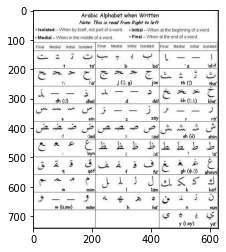

In [159]:
#Creating Clusters
# New Categories:
# 1. ba2 in middle and initial form
# 2. ta2 in middle and initial form
# 3. tha2 in middle and initial form
# 4. ja2 in middle and initial form
# 5. 7a2 in middle and initial form
# 6. 5a2 in middle and initial form
# 7. sa2 in middle and initial form
# 8. sha2 in middle and initial form
# 9. sad in middle and initial form
# 10. thad in middle and initial form
# 11. 3ayn in initial form
# 12. 3ayn in middle form
# 13. 3ayn in end form
# 14. ghayn in initial form
# 15. ghayn in middle form
# 16. ghayn in end form
# 17. fa2 in middle and initial form
# 18. 9a2 in middle and initial form
# 19. kaf in middle and initial form
# 20. lam in middle and initial form
# 21. meem in middle and initial form
# 22. noon in middle and initial form
# 23. ha2 in middle and initial form
# 24. ha2 in final form
# 25. ya2 in middle and initial form
plt.imshow(cv2.imread(r"D:\School\MedTech\Sophomore Pre-Eng\ISS296\CNN\images\arabic character in different forms.jpg"))

In [161]:
len(FailedImg)

2

In [162]:
len(FailedWords)

0

In [163]:
len(FailedCharacters)

0

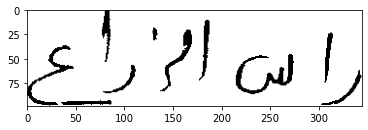

In [167]:
plt.imshow(FailedImg[1],cmap='gray', vmin=0, vmax=255)

In [168]:
len(LoCharacterImgFeatures)

4485

In [169]:
len(LoCharacterImages)

4485

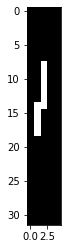

In [170]:
plt.imshow(LoCharacterImages[0],cmap='gray', vmin=0, vmax=255)

In [185]:
cv2.imwrite(OUTPUTS_PATH, LoCharacterImages[0])
#LoCharacterImages[0].save(r"C:\Users\rassa\Desktop\test.png", 'JPEG')

True

In [173]:
k = 28 + 25
clusters = KMeans(k, random_state = 40)
clusters.fit(LoCharacterImgFeatures)

KMeans(n_clusters=53, random_state=40)

In [188]:
clusters.labels_[0]

22

In [186]:
len(clusters.labels_)

4485

In [187]:
len(LoCharacterImages)

4485

In [193]:
OUTPUT_PATH = 'C:/Users/rassa/Documents/Machine Learning A-Z  Udemy/Code/ISS296/Outputs/' + str(clusters.labels_[0]) + '/'+ str(0)+ '.png'
cv2.imwrite(OUTPUT_PATH, LoCharacterImages[0])


True

In [192]:
print(OUTPUT_PATH)

C:/Users/rassa/Documents/Machine Learning A-Z  Udemy/Code/ISS296/Outputs/22/0.png


In [194]:
for i in range(len(clusters.labels_)):
    OUTPUT_PATH = 'C:/Users/rassa/Documents/Machine Learning A-Z  Udemy/Code/ISS296/Outputs/' + str(clusters.labels_[i]) + '/'+ str(i)+ '.png'
    cv2.imwrite(OUTPUT_PATH, LoCharacterImages[i])


In [ ]:
image_cluster = pd.DataFrame(LoTestImgNames,columns=['image name'])
image_cluster["clusterid"] = clusters.labels_

In [ ]:
print(image_cluster)

In [ ]:
LoClusterIdsForLabel=[]
for label in range(1,28):
    clusterIdsFor_label = []
    for i in range(len(LoTrueTestImgLabels)):
        if int(LoTrueTestImgLabels[i]) == label:
            clusterIdsFor_label.append(clusters.labels_[i])
    LoClusterIdsForLabel.append(clusterIdsFor_label)

print(LoClusterIdsForLabel[0])

In [ ]:
max(set(clusterIdsFor_Alif), key=clusterIdsFor_Alif.count)

In [ ]:
clusterIdsFor_Alif.count(24)

In [ ]:
import collections


In [ ]:
ctr = collections.Counter(clusterIdsFor_Alif)
